In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

In [3]:
df = pd.read_excel("System_combined.xlsx")
df

,Unnamed: 0,DateTime,systemPrice
0,0,2018-01-01 00:00:00,26.263485
1,1,2018-01-01 01:00:00,26.382834
2,2,2018-01-01 02:00:00,26.043561
3,3,2018-01-01 03:00:00,24.585894
4,4,2018-01-01 04:00:00,24.626124
...,...,...,...
52579,8755,2023-12-31 19:00:00,49.594203
52580,8756,2023-12-31 20:00:00,44.985186
52581,8757,2023-12-31 21:00:00,44.755875
52582,8758,2023-12-31 22:00:00,43.986141


In [4]:
df.set_index("DateTime", inplace=True)
df.sort_index(ascending=True)
df = df.drop("Unnamed: 0", axis = 1)
df

,systemPrice
DateTime,
2018-01-01 00:00:00,26.263485
2018-01-01 01:00:00,26.382834
2018-01-01 02:00:00,26.043561
2018-01-01 03:00:00,24.585894
2018-01-01 04:00:00,24.626124
...,...
2023-12-31 19:00:00,49.594203
2023-12-31 20:00:00,44.985186
2023-12-31 21:00:00,44.755875


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52584 entries, 2018-01-01 00:00:00 to 2023-12-31 23:00:00
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   systemPrice  52578 non-null  float64
dtypes: float64(1)
memory usage: 821.6 KB


In [6]:
df.isna().sum()

systemPrice    6
dtype: int64

In [7]:
# Using time series interpolation to fill in the 6 missing values 
df['systemPrice'].interpolate(method='time', inplace=True)


In [8]:
df.isna().sum()

systemPrice    0
dtype: int64

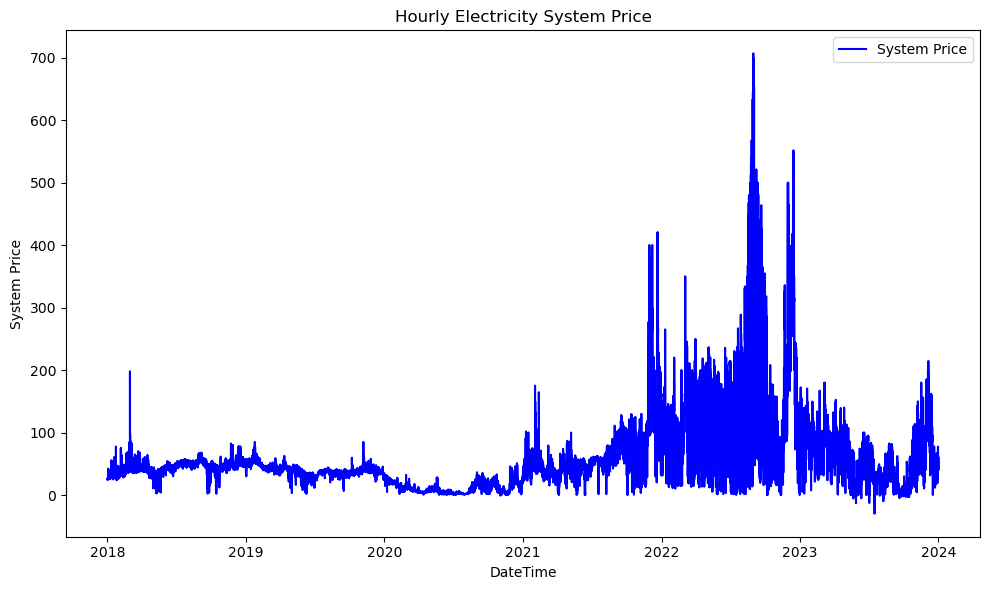

In [9]:
# Plotting
plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df.index, df['systemPrice'], label='System Price', color='blue')  # Plot systemPrice
plt.title('Hourly Electricity System Price')  # Title
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


### Resample data and visualize to look for daily, weekly, monthly, annual trend

In [80]:
daily_data = df.resample('D').mean()
weekly_data = df.resample('W').mean()
monthly_data = df.resample('M').mean()
yearly_data = df.resample('A').mean()

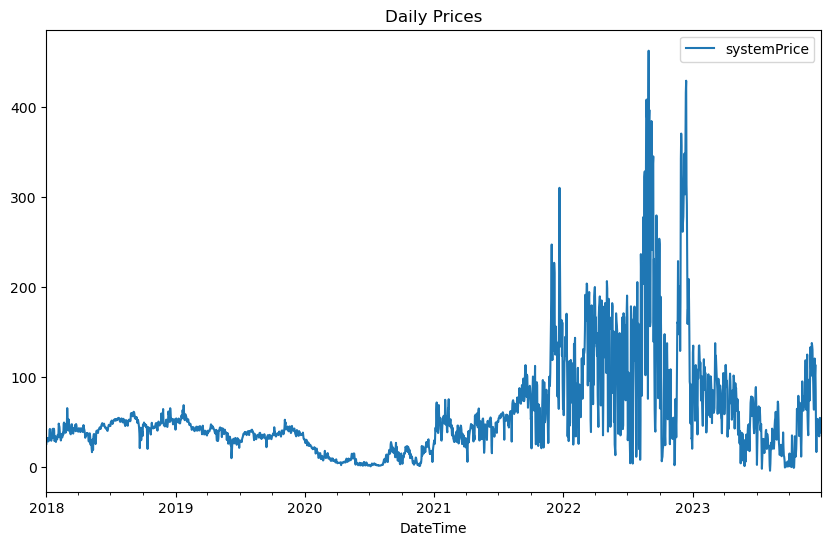

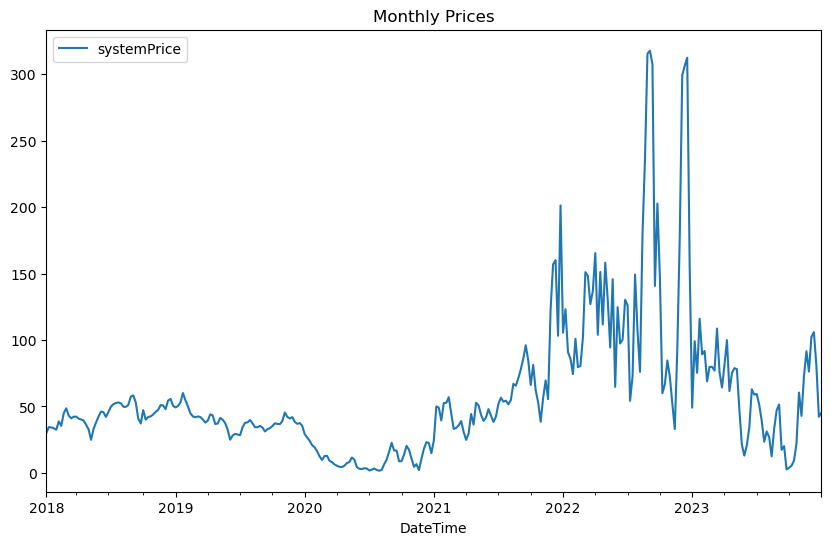

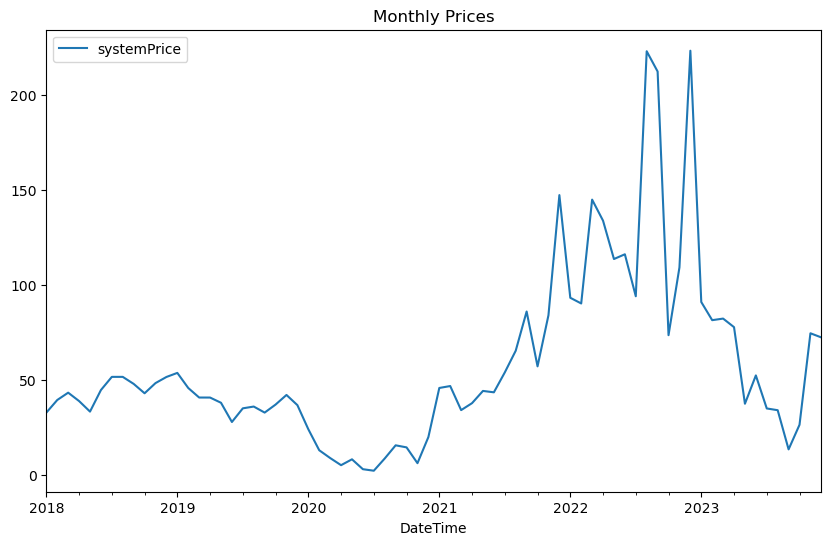

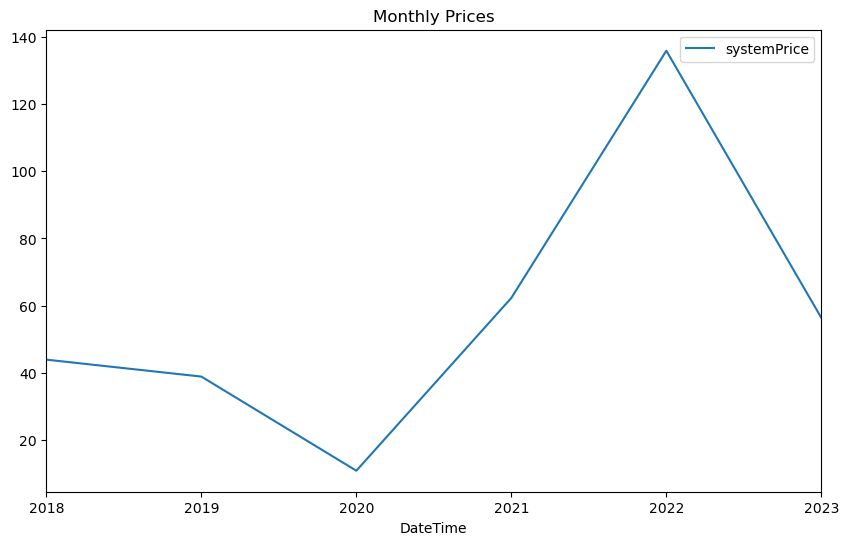

In [81]:

# Plotting daily data
daily_data.plot(figsize=(10, 6))
plt.title('Daily Prices')
plt.show()

# Plotting monthly data
weekly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

# Similarly, for weekly and yearly
monthly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

yearly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()

## Plotting for 2023

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_44207/1542869825.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_2023 = df['2023']


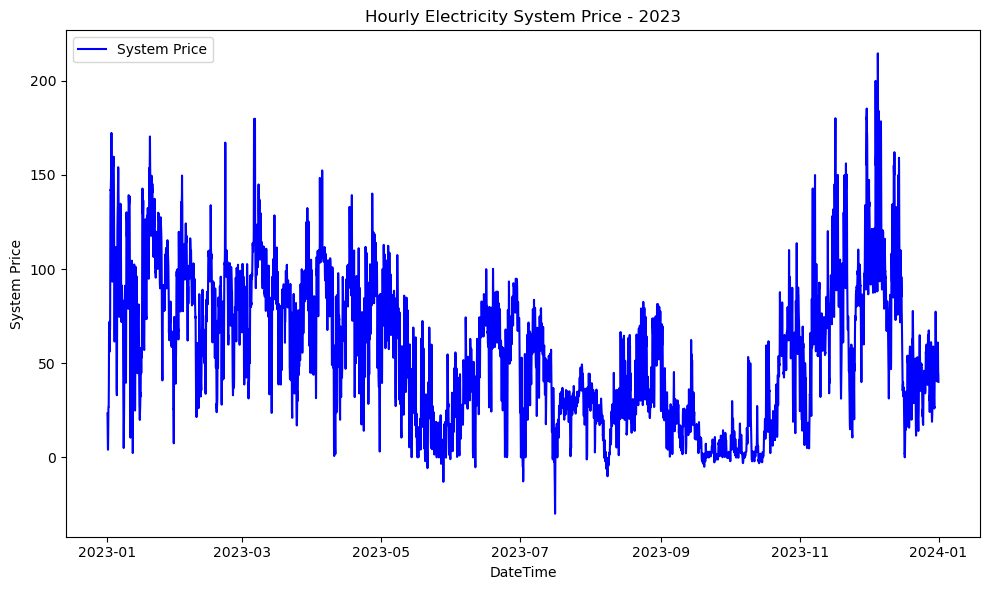

In [83]:
import matplotlib.pyplot as plt

# Filter the DataFrame for the year 2020
df_2023 = df['2023']

plt.figure(figsize=(10, 6))  # Optional: Adjust figure size
plt.plot(df_2023.index, df_2023['systemPrice'], label='System Price', color='blue')  # Plot systemPrice for 2020
plt.title('Hourly Electricity System Price - 2023')  # Title for 2023
plt.xlabel('DateTime')  # X-axis label
plt.ylabel('System Price')  # Y-axis label
plt.legend()  # Show legend
plt.tight_layout()  # Optional: Adjust layout to make room for labels

# To show the plot if not automatically displayed
plt.show()


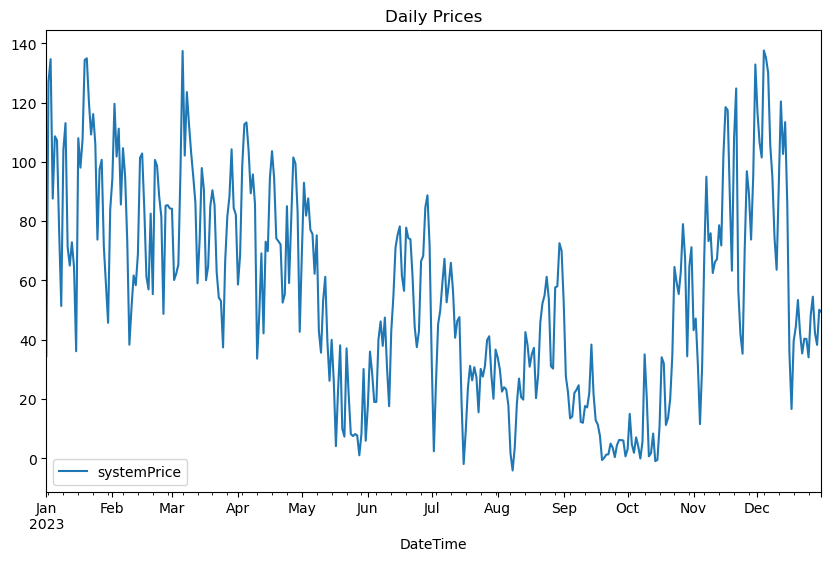

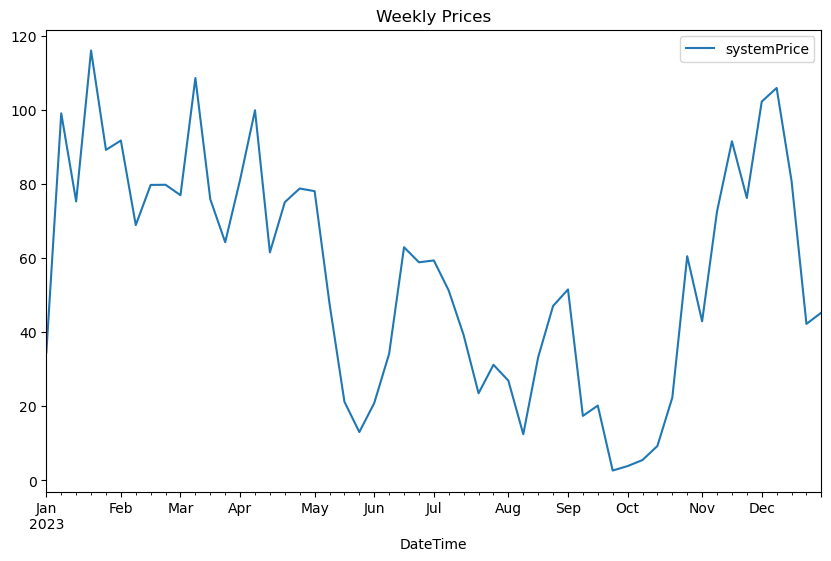

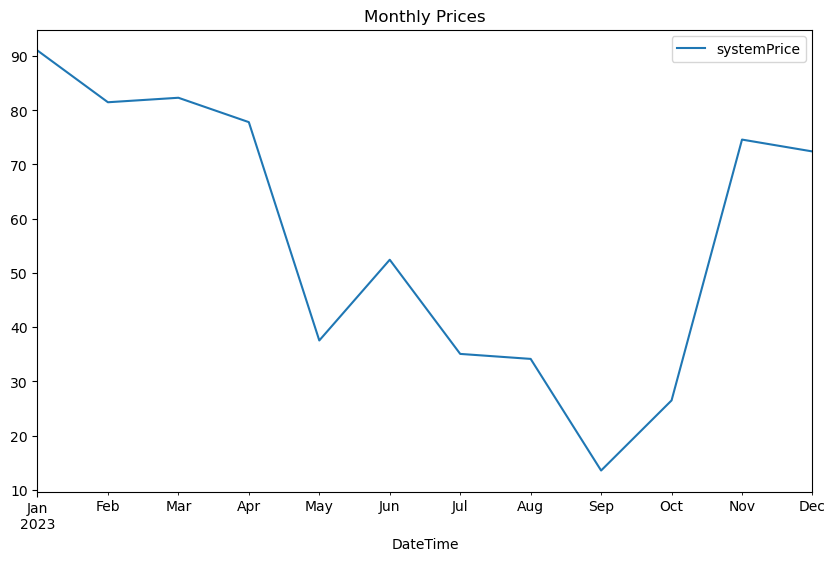

In [84]:
daily_data = df_2023.resample('D').mean()
weekly_data = df_2023.resample('W').mean()
monthly_data = df_2023.resample('M').mean()

# Plotting daily data
daily_data.plot(figsize=(10, 6))
plt.title('Daily Prices')
plt.show()

# Plotting monthly data
weekly_data.plot(figsize=(10, 6))
plt.title('Weekly Prices')
plt.show()

# Similarly, for weekly and yearly
monthly_data.plot(figsize=(10, 6))
plt.title('Monthly Prices')
plt.show()



## Time series Decomposition 

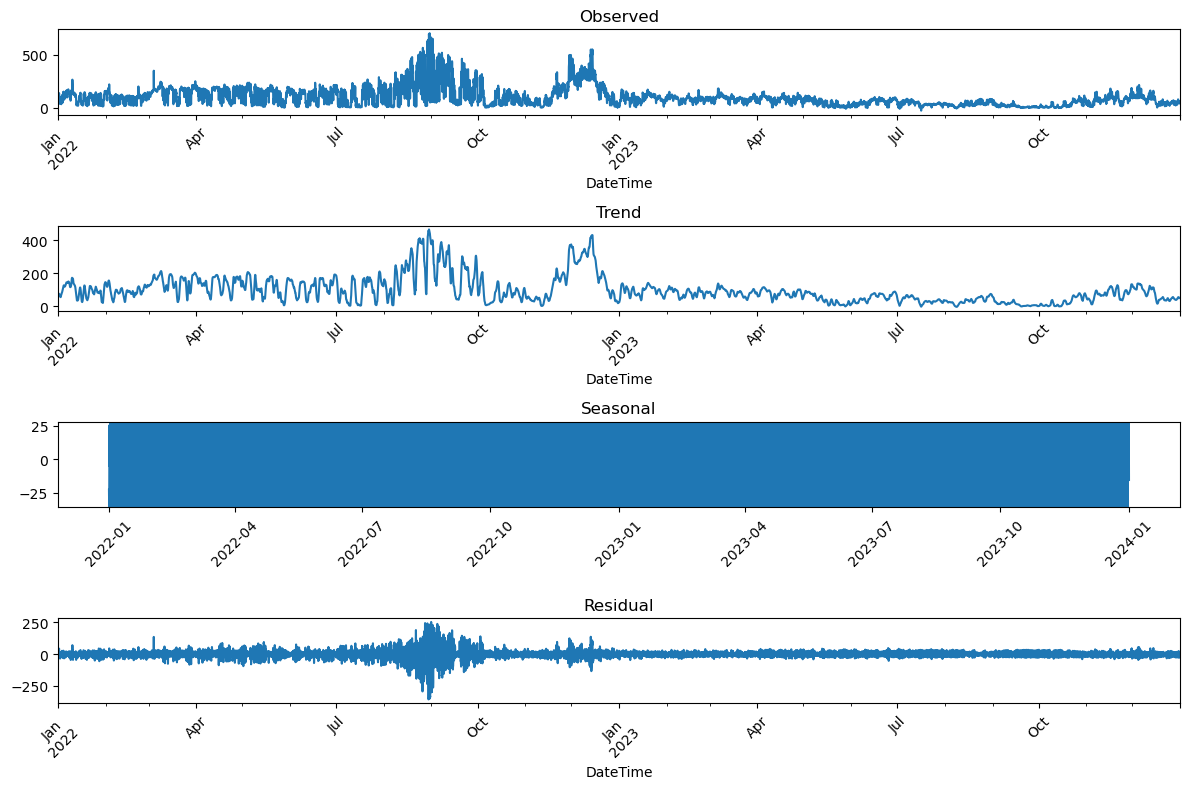

In [91]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Assuming your DataFrame is indexed by datetime and focusing on 2023
df_2023 = df['2022':'2023']

# Decompose the time series
decomposition = seasonal_decompose(df_2023['systemPrice'], model='additive')

# Plot the decomposed components
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(12, 8))  # Adjust the figsize as necessary

# Plot the observed, trend, seasonal, and residual components
decomposition.observed.plot(ax=ax1, title='Observed')
decomposition.trend.plot(ax=ax2, title='Trend')

# Here we plot the seasonal component and set y-axis limits
ax3.plot(decomposition.seasonal.index, decomposition.seasonal, label='Seasonal')
ax3.set_title('Seasonal')
ax3.set_ylim(decomposition.seasonal.min(), decomposition.seasonal.max())  # Set the y-axis limits

decomposition.resid.plot(ax=ax4, title='Residual')

# Rotate the x-axis labels for all subplots
for ax in [ax1, ax2, ax3, ax4]:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Adjust the layout
plt.tight_layout()
plt.show()


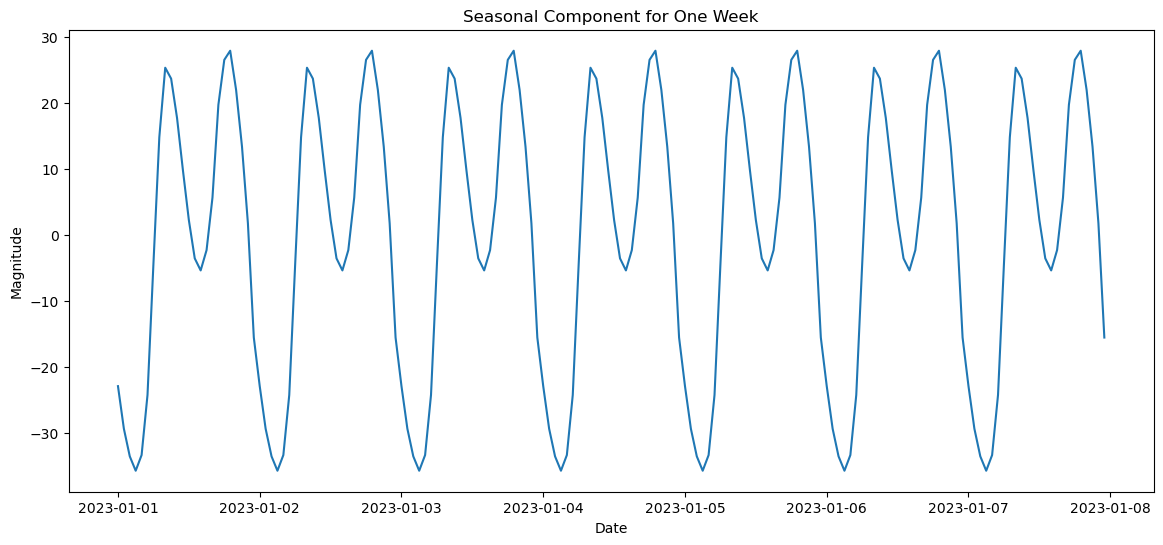

In [86]:
# Plot the seasonal component for a shorter timeframe
plt.figure(figsize=(14, 6))
plt.plot(decomposition.seasonal['2023-01-01':'2023-01-07'])  # Plotting just one week
plt.title('Seasonal Component for One Week')
plt.xlabel('Date')
plt.ylabel('Magnitude')
plt.show()


## Check for stationarity 

In [87]:
result = adfuller(df_2023['systemPrice'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -7.261984
p-value: 0.000000


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


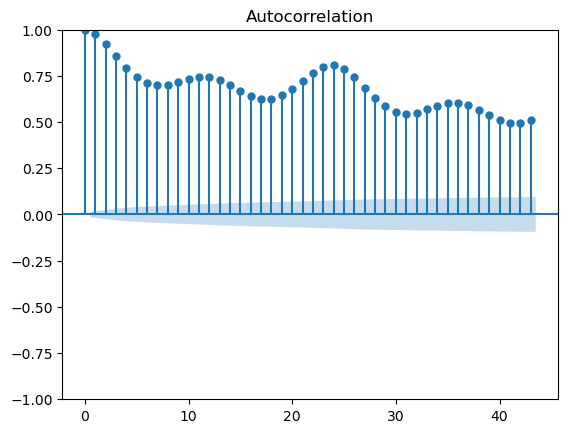

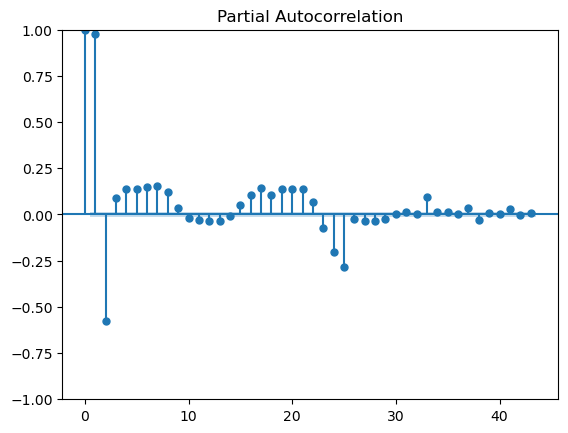

In [88]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for the differenced and seasonally differenced data
plot_acf(df_2023)
plot_pacf(df_2023)
plt.show()


## Differencing (detrending and deseasonalizing)

In [89]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Perform differencing on the 'systemPrice' column to remove trends and seasonality
# First-order differencing
df_2023['price_diff_1'] = df_2023['systemPrice'].diff()

# Seasonal differencing (assuming a daily pattern in hourly data, with period 24)
df_2023['price_diff_seasonal'] = df_2023['systemPrice'].diff(24)

# Drop the NaN values created by differencing
df_2023_diff1 = df_2023['price_diff_1'].dropna()
df_2023_diff_seasonal = df_2023['price_diff_seasonal'].dropna()


# Assuming df_2023_diff1 and df_2023_diff_seasonal are loaded with the differenced data
# Perform ADF test on first-order differenced data
adf_test_diff1 = adfuller(df_2023_diff1, autolag='AIC')

# Perform ADF test on seasonally differenced data
adf_test_seasonal_diff = adfuller(df_2023_diff_seasonal, autolag='AIC')

# Output the ADF test results for first-order differencing
print("ADF Statistic (First-order Differencing): ", adf_test_diff1[0])
print("p-value (First-order Differencing): ", adf_test_diff1[1])
print("Critical Values (First-order Differencing):")
for key, value in adf_test_diff1[4].items():
    print(f'\t{key}: {value}')

# Output the ADF test results for seasonal differencing
print("\nADF Statistic (Seasonal Differencing): ", adf_test_seasonal_diff[0])
print("p-value (Seasonal Differencing): ", adf_test_seasonal_diff[1])
print("Critical Values (Seasonal Differencing):")
for key, value in adf_test_seasonal_diff[4].items():
    print(f'\t{key}: {value}')

/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_44207/4172744424.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['price_diff_1'] = df_2023['systemPrice'].diff()
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_44207/4172744424.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2023['price_diff_seasonal'] = df_2023['systemPrice'].diff(24)


ADF Statistic (First-order Differencing):  -26.344608378500755
p-value (First-order Differencing):  0.0
Critical Values (First-order Differencing):
	1%: -3.4307242852745428
	5%: -2.8617054196196627
	10%: -2.566858048572343

ADF Statistic (Seasonal Differencing):  -25.385922453415567
p-value (Seasonal Differencing):  0.0
Critical Values (Seasonal Differencing):
	1%: -3.4307247786461597
	5%: -2.861705637657079
	10%: -2.566858164630393


ADF Test Results

First-order Differencing:
- The Augmented Dickey-Fuller (ADF) statistic of -18.7301554521554 and the p-value of approximately 0 indicate that, after first-order differencing, your time series is stationary. - The ADF statistic is far below the critical values, and the p-value is significantly less than 0.05, strongly rejecting the null hypothesis of the presence of a unit root.

Seasonal Differencing:
- Similarly, the ADF statistic of -16.224653999395347 and the p-value close to 0 for the seasonally differenced data also suggest stationarity. 

Both the first-order and seasonal differencing have rendered your time series data stationary, as indicated by the significantly negative ADF statistics and the near-zero p-values in both tests. This implies that both types of differencing have effectively removed trends and seasonality from the original series, making the data suitable for further analysis with ARIMA or other time series forecasting models.

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


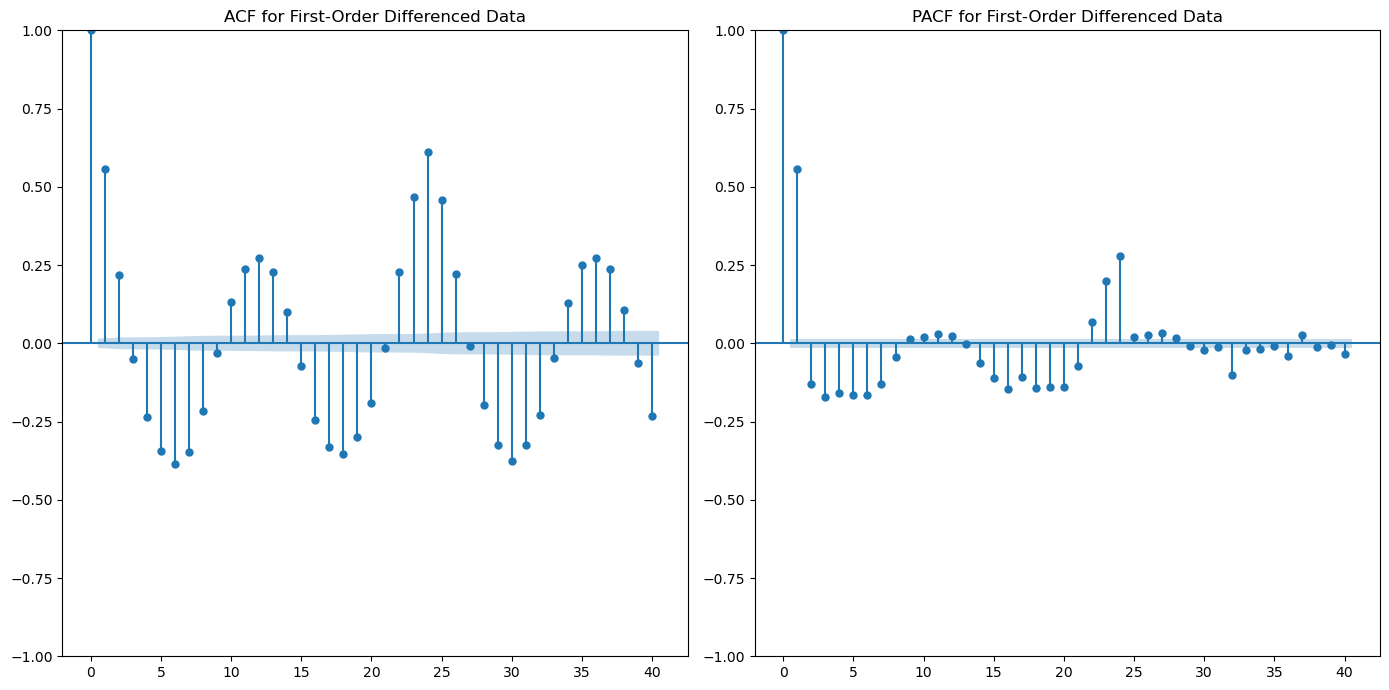

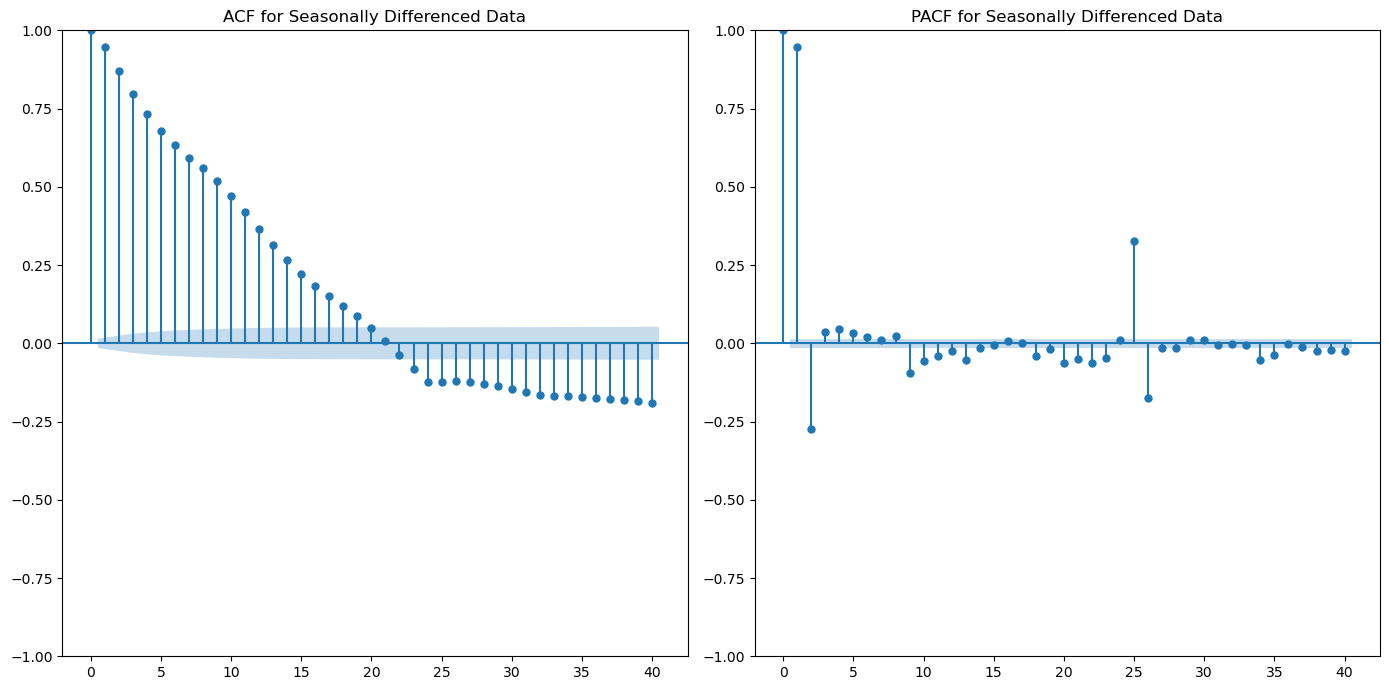

In [90]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF and PACF for first-order differenced data
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(df_2023_diff1, ax=plt.gca(), lags=40, title='ACF for First-Order Differenced Data')
plt.subplot(122)
plot_pacf(df_2023_diff1, ax=plt.gca(), lags=40, title='PACF for First-Order Differenced Data')
plt.tight_layout()
plt.show()

# Plot ACF and PACF for seasonally differenced data
plt.figure(figsize=(14, 7))
plt.subplot(121)
plot_acf(df_2023_diff_seasonal, ax=plt.gca(), lags=40, title='ACF for Seasonally Differenced Data')
plt.subplot(122)
plot_pacf(df_2023_diff_seasonal, ax=plt.gca(), lags=40, title='PACF for Seasonally Differenced Data')
plt.tight_layout()
plt.show()


# ARIMA model building 

In [10]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import acf
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'df_2023' is your DataFrame and 'systemPrice' is the column with your time series data.
# Splitting the data into train and test sets (80% train, 20% test)

#train_size = int(len(df_2023) * 0.8)
#train, test = df_2023[0:train_size], df_2023[train_size:len(df_2023)]
#train, test = df_2023.iloc[:-24, :], df_2023.iloc[-24:, :]

/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_45238/2812221043.py:29: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(pd.Series([test.iloc[t]], index=[test.index[t]]))
/Users/evenbakke/opt/anaconda3/lib/python3.

Test RMSE: 5.929


/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_45238/2812221043.py:29: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(pd.Series([test.iloc[t]], index=[test.index[t]]))


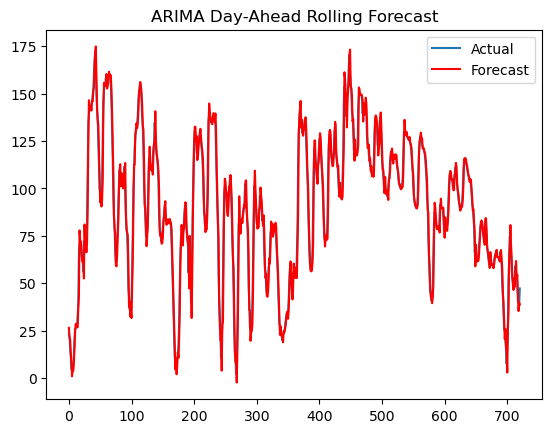

In [14]:
from statsmodels.tsa.arima.model import ARIMA

# Split the data into training and testing sets
train = df[df.index.year < 2023]['systemPrice']
#test = df[df.index.year == 2023]['systemPrice']

start_date = '2023-01-01'
end_date = '2023-01-31'

# Update the test set to include only the data for the specified one-week period
test = df[(df.index >= start_date) & (df.index <= end_date)]['systemPrice']

history = train.copy()  # History is the training data to which we'll append the test data iteratively
predictions = list()

# Walk-forward validation
for t in range(len(test)):
    # Fit the ARIMA model on the history
    model = ARIMA(history, order=(1,1,0))  # Change the order as per your model selection
    model_fit = model.fit()
    
    # Forecast the next time point
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    
    # Append the actual test observation to the history for the next loop
    # The fix is here: wrap yhat in pd.Series and provide the index from the test series
    history = history.append(pd.Series([test.iloc[t]], index=[test.index[t]]))

# Evaluate forecasts
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.plot(test.values, label='Actual')
plt.plot(predictions, color='red', label='Forecast')
plt.title('ARIMA Day-Ahead Rolling Forecast')
plt.legend()
plt.show()


/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/var/folders/f_/j_mdbrm574j13dk_c3yb57xm0000gn/T/ipykernel_45238/3064594001.py:27: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  history = history.append(pd.Series([yhat], index=[test.index[t]]))
/Users/evenbakke/opt/anaconda3/lib/python3.9/site-p

Test RMSE: 85.174


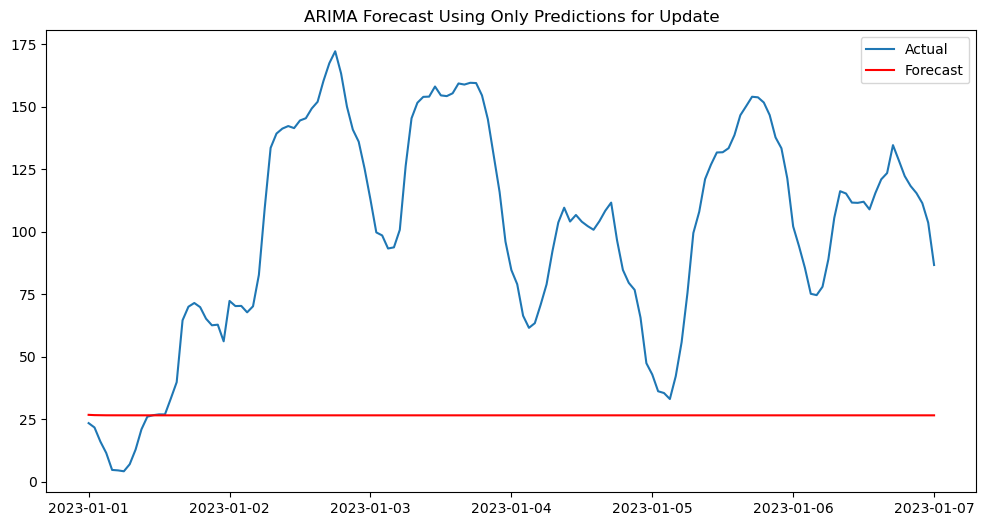

In [16]:
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Assuming df is your original DataFrame with 'systemPrice' column and DateTime index
# We will also assume that df is already defined and contains your data up to 2023

# Split the data into training and testing sets
train = df[df.index.year < 2023]['systemPrice']
test = df[(df.index >= '2023-01-01') & (df.index <= '2023-01-07')]['systemPrice']

history = train.copy()  # Start with the historical data
predictions = list()

# Walk-forward validation using only predictions to update history
for t in range(len(test)):
    model = ARIMA(history, order=(1,1,1))
    model_fit = model.fit()
    
    # Forecast the next time point
    yhat = model_fit.forecast()[0]
    predictions.append(yhat)
    
    # Append the predicted value to the history for the next loop
    history = history.append(pd.Series([yhat], index=[test.index[t]]))

# Calculate RMSE using the predictions and the actual test data
rmse = np.sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

# Plot forecasts against actual outcomes
plt.figure(figsize=(12, 6))
plt.plot(test.index, test.values, label='Actual')
plt.plot(test.index, predictions, color='red', label='Forecast')
plt.title('ARIMA Forecast Using Only Predictions for Update')
plt.legend()
plt.show()


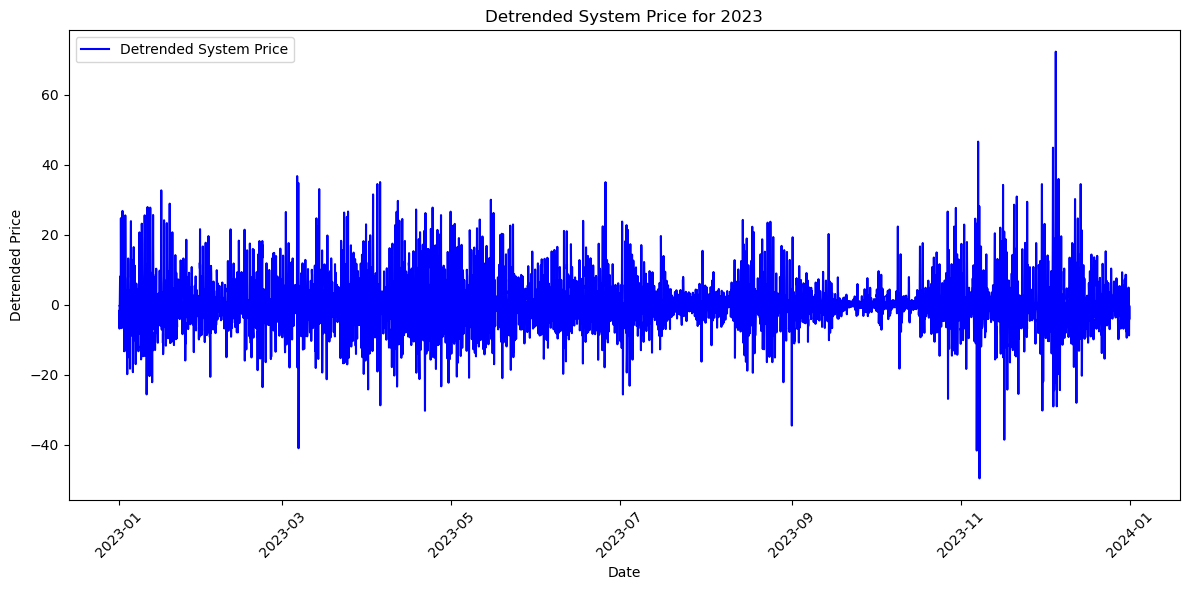

In [22]:
import matplotlib.pyplot as plt

# Assuming 'price_diff_1' column in df_2023 represents the detrended system price
plt.figure(figsize=(12, 6))
plt.plot(df_2023['price_diff_1'], label='Detrended System Price', color='blue')
plt.title('Detrended System Price for 2023')
plt.xlabel('Date')
plt.ylabel('Detrended Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to ensure everything fits without overlapping
plt.show()
